In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def readImagesAndTimes():
    filenames = ["img1.png", "img2.png", "img3.png", "img4.png", "img5.png"]
    times = [0.03125, 0.0625, 0.125, 0.25, 8]
    times = np.array(times, np.float32)

    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        im =cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        images.append(im)
    
    return images, times



align images

In [6]:
images, times = readImagesAndTimes()

alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

estimate camera response function

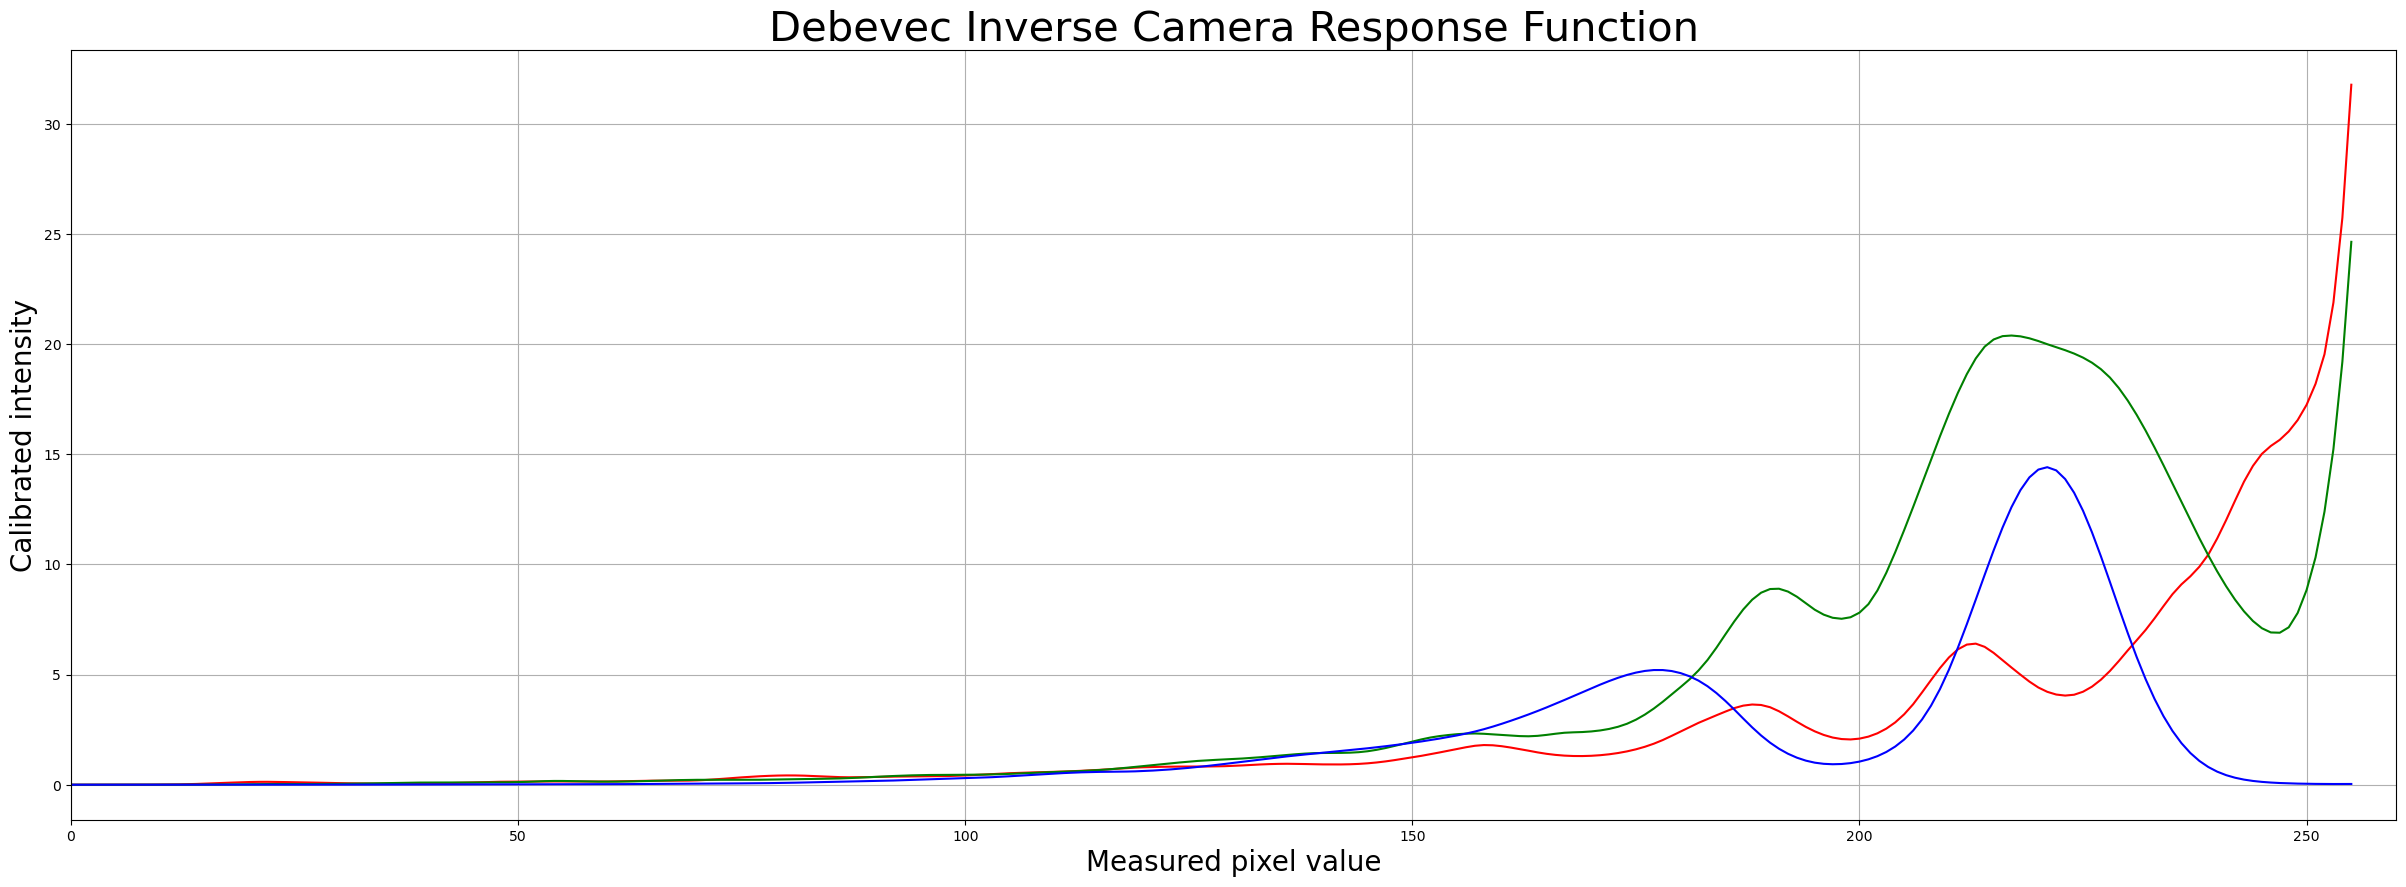

In [9]:
#find camera response function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

#plot crf
x = np.arange(256, dtype = np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30, 10))
plt.title("Debevec Inverse Camera Response Function", fontsize = 30)
plt.xlabel("Measured pixel value", fontsize = 20)
plt.ylabel("Calibrated intensity", fontsize = 20)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:,0],'r',x,y[:,1],'g',x,y[:,2],'b')

Merge exposure into an hdr image

In [10]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

tonemapping

drago img saved


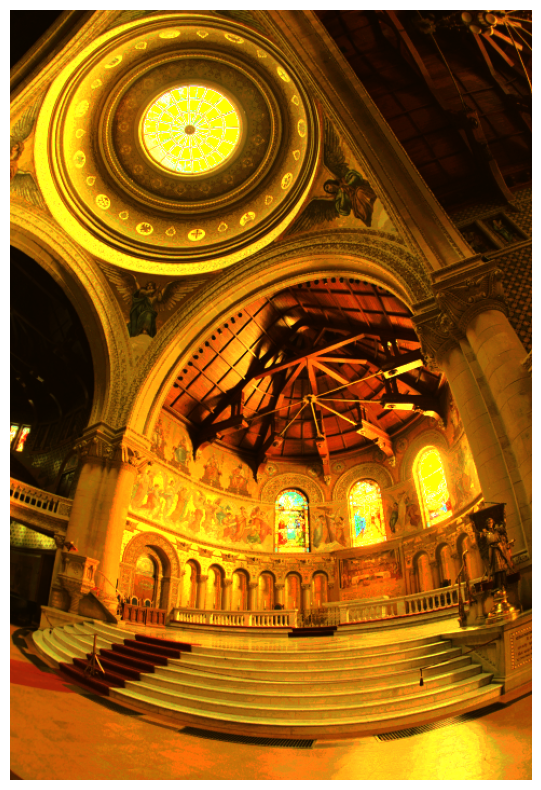

In [12]:
#tonemap using drago's method to obtain 24-bit LDR image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.figure(figsize=(20, 10)); plt.imshow(np.clip(ldrDrago, 0, 1)); plt.axis('off');
cv2.imwrite("hdr.png", ldrDrago*255)
print("drago img saved")
